In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio as ii
import torch
import os
from google.colab import drive
import torchvision
from torch import nn
from tqdm import tqdm
from time import sleep

In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
!ls

drive  sample_data


In [ ]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [ ]:
%ls

 450/   TransferLearning.ipynb  'VGG-16 : Bird Identification'


In [ ]:
%cd "/content/drive/My Drive/450/archive/train"

/content/drive/My Drive/450/archive/train


In [ ]:
train_path="/content/drive/My Drive/450/archive/train"
valid_path="/content/drive/My Drive/450/archive/valid"
test_path="/content/drive/My Drive/450/archive/test"

In [ ]:
transform=torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Lambda(lambda x:x/255.0),
    torchvision.transforms.Resize((256,256))
])

In [ ]:
train_data=torchvision.datasets.ImageFolder(train_path,transform=transform)

In [ ]:
train_data.class_to_idx

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'ALBATROSS': 8,
 'ALBERTS TOWHEE': 9,
 'ALEXANDRINE PARAKEET': 10,
 'ALPINE CHOUGH': 11,
 'ALTAMIRA YELLOWTHROAT': 12,
 'AMERICAN AVOCET': 13,
 'AMERICAN BITTERN': 14,
 'AMERICAN COOT': 15,
 'AMERICAN FLAMINGO': 16,
 'AMERICAN GOLDFINCH': 17,
 'AMERICAN KESTREL': 18,
 'AMERICAN PIPIT': 19,
 'AMERICAN REDSTART': 20,
 'AMERICAN WIGEON': 21,
 'AMETHYST WOODSTAR': 22,
 'ANDEAN GOOSE': 23,
 'ANDEAN LAPWING': 24,
 'ANDEAN SISKIN': 25,
 'ANHINGA': 26,
 'ANIANIAU': 27,
 'ANNAS HUMMINGBIRD': 28,
 'ANTBIRD': 29,
 'ANTILLEAN EUPHONIA': 30,
 'APAPANE': 31,
 'APOSTLEBIRD': 32,
 'ARARIPE MANAKIN': 33,
 'ASHY STORM PETREL': 34,
 'ASHY THRUSHBIRD': 35,
 'ASIAN CRESTED IBIS': 36,
 'ASIAN DOLLARD BIRD': 37,
 'AUCKLAND SHAQ': 38,
 'AUSTRAL CANASTERO': 39,
 'AUSTRALASIAN FIGBIRD': 40,
 '

In [ ]:
valid_data=torchvision.datasets.ImageFolder(valid_path,transform=transform)
test_data=torchvision.datasets.ImageFolder(test_path,transform=transform)

In [ ]:
# class train_dataloader(torch.utils.data.Dataset):
#   def __init__(self,train_data):
#     self.train_dataset=train_data
#   def __getitem__(self,index):
#     train_image,train_label=self.train_dataset[index]
#     return train_image,train_label
#   def __len__(self):
#     return len(self.train_dataset)

In [ ]:
#dataset=train_dataloader(train_data)

In [ ]:
train_dataloader=torch.utils.data.DataLoader(train_data,batch_size=64,shuffle=True)
test_dalaloader=torch.utils.data.DataLoader(test_data,batch_size=64,shuffle=True)
valid_dataloader=torch.utils.data.DataLoader(valid_data,batch_size=64,shuffle=True)

In [ ]:
batch_size=64

In [ ]:
image,label=next(iter(train_dataloader))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


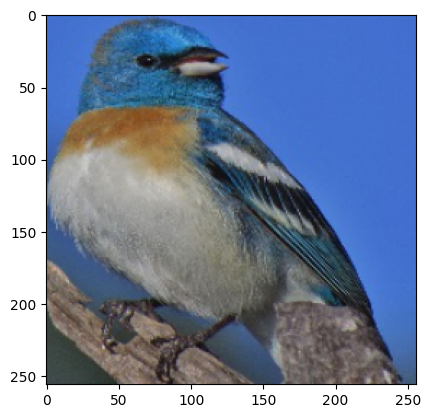

In [ ]:
plt.imshow(image[7,:,:,:].permute(1,2,0))

In [ ]:
label[7].data

tensor(293)

In [ ]:
densenet201=torchvision.models.densenet201(pretrained=True)
efficientnetv2=torchvision.models.efficientnet_v2_l(pretrained=True)
inceptionv3=torchvision.models.inception_v3(pretrained=True)
vgg19=torchvision.models.vgg19_bn(pretrained=True)
mobilenetv3=torchvision.models.mobilenet_v3_large(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:01<00:00, 48.2MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may

# VGG 19

In [ ]:
print(vgg19)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
print(torch.cuda.get_device_name(0))

Tesla T4


In [ ]:
cuda_new=torch.device("cuda:0")

In [ ]:
cuda_new

device(type='cuda', index=0)

In [ ]:
for param in vgg19.parameters():
  print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
for param in vgg19.parameters():
  param.requires_grad=False

In [ ]:
for param in vgg19.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
number_of_features_vgg=vgg19.classifier[6].in_features
vgg19.classifier[6]=nn.Linear(number_of_features_vgg,450)

In [ ]:
for param in vgg19.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [ ]:
#print(vgg19)

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer_vgg=torch.optim.Adam(vgg19.classifier[6].parameters(),lr=0.01)

In [ ]:
#torch.save(vgg19.state_dict(),'vgg19.pth')

In [ ]:
def training_loop_vgg(train_dataset,valid_dataset,epochs,model,device,batch_size):
  for epoch_number in range(epochs):
    num_correct_train=0
    num_correct_eval=0
    with tqdm(train_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.train()
        optimizer_vgg.zero_grad()
        images=images.to(device)
        labels=labels.to(device)
        prediction=model(images)
        loss=loss_function(prediction,labels)
        loss.backward()
        optimizer_vgg.step()
        tepoch.set_description(f"Epoch (Training) : {epoch_number}")
        _,results=torch.max(prediction,1)
        num_correct_train+=torch.sum(results==labels.data)
        train_epoch_accuracy=num_correct_train.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,train_epoch_accuracy=train_epoch_accuracy)
        #print(f"Training_Loss : {}")
        sleep(0.1)
    torch.save(model.state_dict(),'vgg19.pth')
    with tqdm(valid_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.eval()
        images=images.to(device)
        labels=labels.to(device)
        preds=model(images)
        loss=loss_function(preds,labels)
        tepoch.set_description(f"Epoch (Validation) : {epoch_number}")
        _,results=torch.max(preds,1)
        num_correct_eval+=torch.sum(results==labels.data)
        valid_epoch_accuracy=num_correct_eval.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,valid_epoch_accuracy=valid_epoch_accuracy)
        sleep(0.1)
    


In [ ]:
vgg19.load_state_dict(torch.load('vgg19.pth'))
training_loop_vgg(train_dataloader,valid_dataloader,1,vgg19.to(cuda_new),cuda_new,batch_size)

Epoch (Training) : 0:  25%|██▍       | 272/1089 [1:08:48<3:22:30, 14.87s/batch, loss=4.92, train_epoch_accuracy=tensor(111., device='cuda:0', dtype=torch.float64)]

# INCEPTION_V3

In [ ]:
print(inceptionv3)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
for param in inceptionv3.parameters():
  param.requires_grad=False
number_of_features_inception=inceptionv3.fc.in_features
inceptionv3.fc=nn.Linear(number_of_features_inception,450)
for param in inceptionv3.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
optimizer_inception=torch.optim.Adam(inceptionv3.fc.parameters(),lr=0.01)

In [ ]:
def training_loop_inception(train_dataset,valid_dataset,epochs,model,device,batch_size):
  for epoch_number in range(epochs):
    num_correct_train=0
    num_correct_eval=0
    with tqdm(train_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.train()
        optimizer_inception.zero_grad()
        images=images.to(device)
        labels=labels.to(device)
        prediction=model(images)
        loss=loss_function(prediction,labels)
        loss.backward()
        optimizer_inception.step()
        tepoch.set_description(f"Epoch (Training) : {epoch_number}")
        _,results=torch.max(prediction,1)
        num_correct_train+=torch.sum(results==labels.data)
        train_epoch_accuracy=num_correct_train.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,train_epoch_accuracy=train_epoch_accuracy)
        #print(f"Training_Loss : {}")
        sleep(0.1)

    with tqdm(valid_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.eval()
        images=images.to(device)
        labels=labels.to(device)
        preds=model(images)
        loss=loss_function(preds,labels)
        tepoch.set_description(f"Epoch (Validation) : {epoch_number}")
        _,results=torch.max(preds,1)
        num_correct_eval+=torch.sum(results==labels.data)
        valid_epoch_accuracy=num_correct_eval.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,valid_epoch_accuracy=valid_epoch_accuracy)
        sleep(0.1)
    torch.save(model.state_dict(),'inceptionv3.pth')

In [ ]:
#torch.save(inceptionv3.state_dict(),'inceptionv3.pth')

In [ ]:
inceptionv3.load_state_dict(torch.load('inceptionv3.pth'))
training_loop_inception(train_dataloader,valid_dataloader,20,inceptionv3.to(cuda_new),cuda_new,batch_size)

# DENSENET_201

In [ ]:
print(densenet201)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
for param in densenet201.parameters():
  param.requires_grad=False
number_of_features_inception=densenet201.classifier.in_features
densenet201.classifier=nn.Linear(number_of_features_inception,450)
for param in densenet201.parameters():
  print(param.requires_grad)
optimizer_densenet=torch.optim.Adam(densenet201.classifier.parameters(),lr=0.01)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
def training_loop_densenet(train_dataset,valid_dataset,epochs,model,device,batch_size):
  for epoch_number in range(epochs):
    num_correct_train=0
    num_correct_eval=0
    with tqdm(train_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.train()
        optimizer_densenet.zero_grad()
        images=images.to(device)
        labels=labels.to(device)
        prediction=model(images)
        loss=loss_function(prediction,labels)
        loss.backward()
        optimizer_densenet.step()
        tepoch.set_description(f"Epoch (Training) : {epoch_number}")
        _,results=torch.max(prediction,1)
        num_correct_train+=torch.sum(results==labels.data)
        train_epoch_accuracy=num_correct_train.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,train_epoch_accuracy=train_epoch_accuracy)
        #print(f"Training_Loss : {}")
        sleep(0.1)

    with tqdm(valid_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.eval()
        images=images.to(device)
        labels=labels.to(device)
        preds=model(images)
        loss=loss_function(preds,labels)
        tepoch.set_description(f"Epoch (Validation) : {epoch_number}")
        _,results=torch.max(preds,1)
        num_correct_eval+=torch.sum(results==labels.data)
        valid_epoch_accuracy=num_correct_eval.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,valid_epoch_accuracy=valid_epoch_accuracy)
        sleep(0.1)
    torch.save(model.state_dict(),'densenet201.pth')

In [ ]:
#torch.save(densenet201.state_dict(),'densenet201.pth')

In [ ]:
densenet201.load_state_dict(torch.load('densenet201.pth'))
training_loop_densenet(train_dataloader,valid_dataloader,20,densenet201.to(cuda_new),cuda_new,batch_size)

# EFFICIENTNET_V2

In [ ]:
print(efficientnetv2)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
for param in efficientnetv2.parameters():
  param.requires_grad=False
number_of_features_efficientnet=efficientnetv2.classifier[1].in_features
efficientnetv2.classifier[1]=nn.Linear(number_of_features_efficientnet,450)
for param in efficientnetv2.parameters():
  print(param.requires_grad)
optimizer_efficientnet=torch.optim.Adam(efficientnetv2.classifier[1].parameters(),lr=0.01)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
def training_loop_efficientnet(train_dataset,valid_dataset,epochs,model,device,batch_size):
  for epoch_number in range(epochs):
    num_correct_train=0
    num_correct_eval=0
    with tqdm(train_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.train()
        optimizer_efficientnet.zero_grad()
        images=images.to(device)
        labels=labels.to(device)
        prediction=model(images)
        loss=loss_function(prediction,labels)
        loss.backward()
        optimizer_efficientnet.step()
        tepoch.set_description(f"Epoch (Training) : {epoch_number}")
        _,results=torch.max(prediction,1)
        num_correct_train+=torch.sum(results==labels.data)
        train_epoch_accuracy=num_correct_train.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,train_epoch_accuracy=train_epoch_accuracy)
        #print(f"Training_Loss : {}")
        sleep(0.1)

    with tqdm(valid_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.eval()
        images=images.to(device)
        labels=labels.to(device)
        preds=model(images)
        loss=loss_function(preds,labels)
        tepoch.set_description(f"Epoch (Validation) : {epoch_number}")
        _,results=torch.max(preds,1)
        num_correct_eval+=torch.sum(results==labels.data)
        valid_epoch_accuracy=num_correct_eval.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,valid_epoch_accuracy=valid_epoch_accuracy)
        sleep(0.1)
    torch.save(model.state_dict(),'efficientnetv2.pth')

In [ ]:
#torch.save(efficientnetv2.state_dict(),'efficientnetv2.pth')

In [ ]:
efficientnetv2.load_state_dict(torch.load('efficientnetv2.pth'))
training_loop_efficientnet(train_dataloader,valid_dataloader,20,efficientnetv2.to(cuda_new),cuda_new,batch_size)

# MOBILENET_V3

In [ ]:
print(mobilenetv3)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [ ]:
for param in mobilenetv3.parameters():
  param.requires_grad=False
number_of_features_mobilenetv3=mobilenetv3.classifier[3].in_features
mobilenetv3.classifier[3]=nn.Linear(number_of_features_mobilenetv3,450)
for param in mobilenetv3.parameters():
  print(param.requires_grad)
optimizer_mobilenetv3=torch.optim.Adam(mobilenetv3.classifier[3].parameters(),lr=0.01)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
def training_loop_mobilenet(train_dataset,valid_dataset,epochs,model,device,batch_size):
  for epoch_number in range(epochs):
    num_correct_train=0
    num_correct_eval=0
    with tqdm(train_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.train()
        optimizer_mobilenetv3.zero_grad()
        images=images.to(device)
        labels=labels.to(device)
        prediction=model(images)
        loss=loss_function(prediction,labels)
        loss.backward()
        optimizer_mobilenetv3.step()
        tepoch.set_description(f"Epoch (Training) : {epoch_number}")
        _,results=torch.max(prediction,1)
        num_correct_train+=torch.sum(results==labels.data)
        train_epoch_accuracy=num_correct_train.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,train_epoch_accuracy=train_epoch_accuracy)
        #print(f"Training_Loss : {}")
        sleep(0.1)

    with tqdm(valid_dataset,unit="batch") as tepoch:
      for images,labels in tepoch:
        model.eval()
        images=images.to(device)
        labels=labels.to(device)
        preds=model(images)
        loss=loss_function(preds,labels)
        tepoch.set_description(f"Epoch (Validation) : {epoch_number}")
        _,results=torch.max(preds,1)
        num_correct_eval+=torch.sum(results==labels.data)
        valid_epoch_accuracy=num_correct_eval.double()/batch_size
        tepoch.set_postfix(loss=loss.item() ,valid_epoch_accuracy=valid_epoch_accuracy)
        sleep(0.1)
    torch.save(model.state_dict(),'mobilenetv3.pth')

In [ ]:
#torch.save(efficientnetv2.state_dict(),'mobilenetv3.pth')

In [ ]:
mobilenetv3.load_state_dict(torch.load('mobilenetv3.pth'))
training_loop_efficientnet(train_dataloader,valid_dataloader,20,mobilenetv3.to(cuda_new),cuda_new,batch_size)